In [17]:
import os
import sys 
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from PCA import PCA
import matplotlib.image as mpimg

In [4]:
# chọn số ảnh muốn thực thi
max_images = 100

In [5]:
IMG_DIR = 'dataset'
images = []
images_flatten = []

total = sum(1 for entry in os.scandir(IMG_DIR) if entry.is_file())
count = 1
if total < max_images:
    max_images = total
for img_path in os.listdir(IMG_DIR):
    if count == max_images + 1:
        break
    img_array = cv.imread(os.path.join(IMG_DIR,img_path), cv.IMREAD_GRAYSCALE)
    img_pil = Image.fromarray(img_array)
    img_64 = np.array(img_pil.resize((64, 64), Image.ANTIALIAS))
    images.append(img_64)
    img_array = img_64.flatten()
    images_flatten.append(img_array)
    count += 1

C:\Users\Admin\AppData\Local\Temp\ipykernel_22556\1417569683.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_64 = np.array(img_pil.resize((64, 64), Image.ANTIALIAS))


In [6]:
###preprocess
images_flatten = np.asarray(images_flatten).T

In [8]:
###PCA
model = PCA()
(Xbar, mu, std) = model.standardize(images_flatten)
num_components = 60
if num_components <= Xbar.shape[1]:
    model.optimize = True
model.fit(Xbar)
reconstructed_img = model.reconstruct_img(Xbar, mu, num_components)

In [ ]:
###thêm preserved_variance
ratio = 0.7 # [0, 1]
reconstructed_img = model.reconstruct_img(Xbar, mu, num_components, ratio)

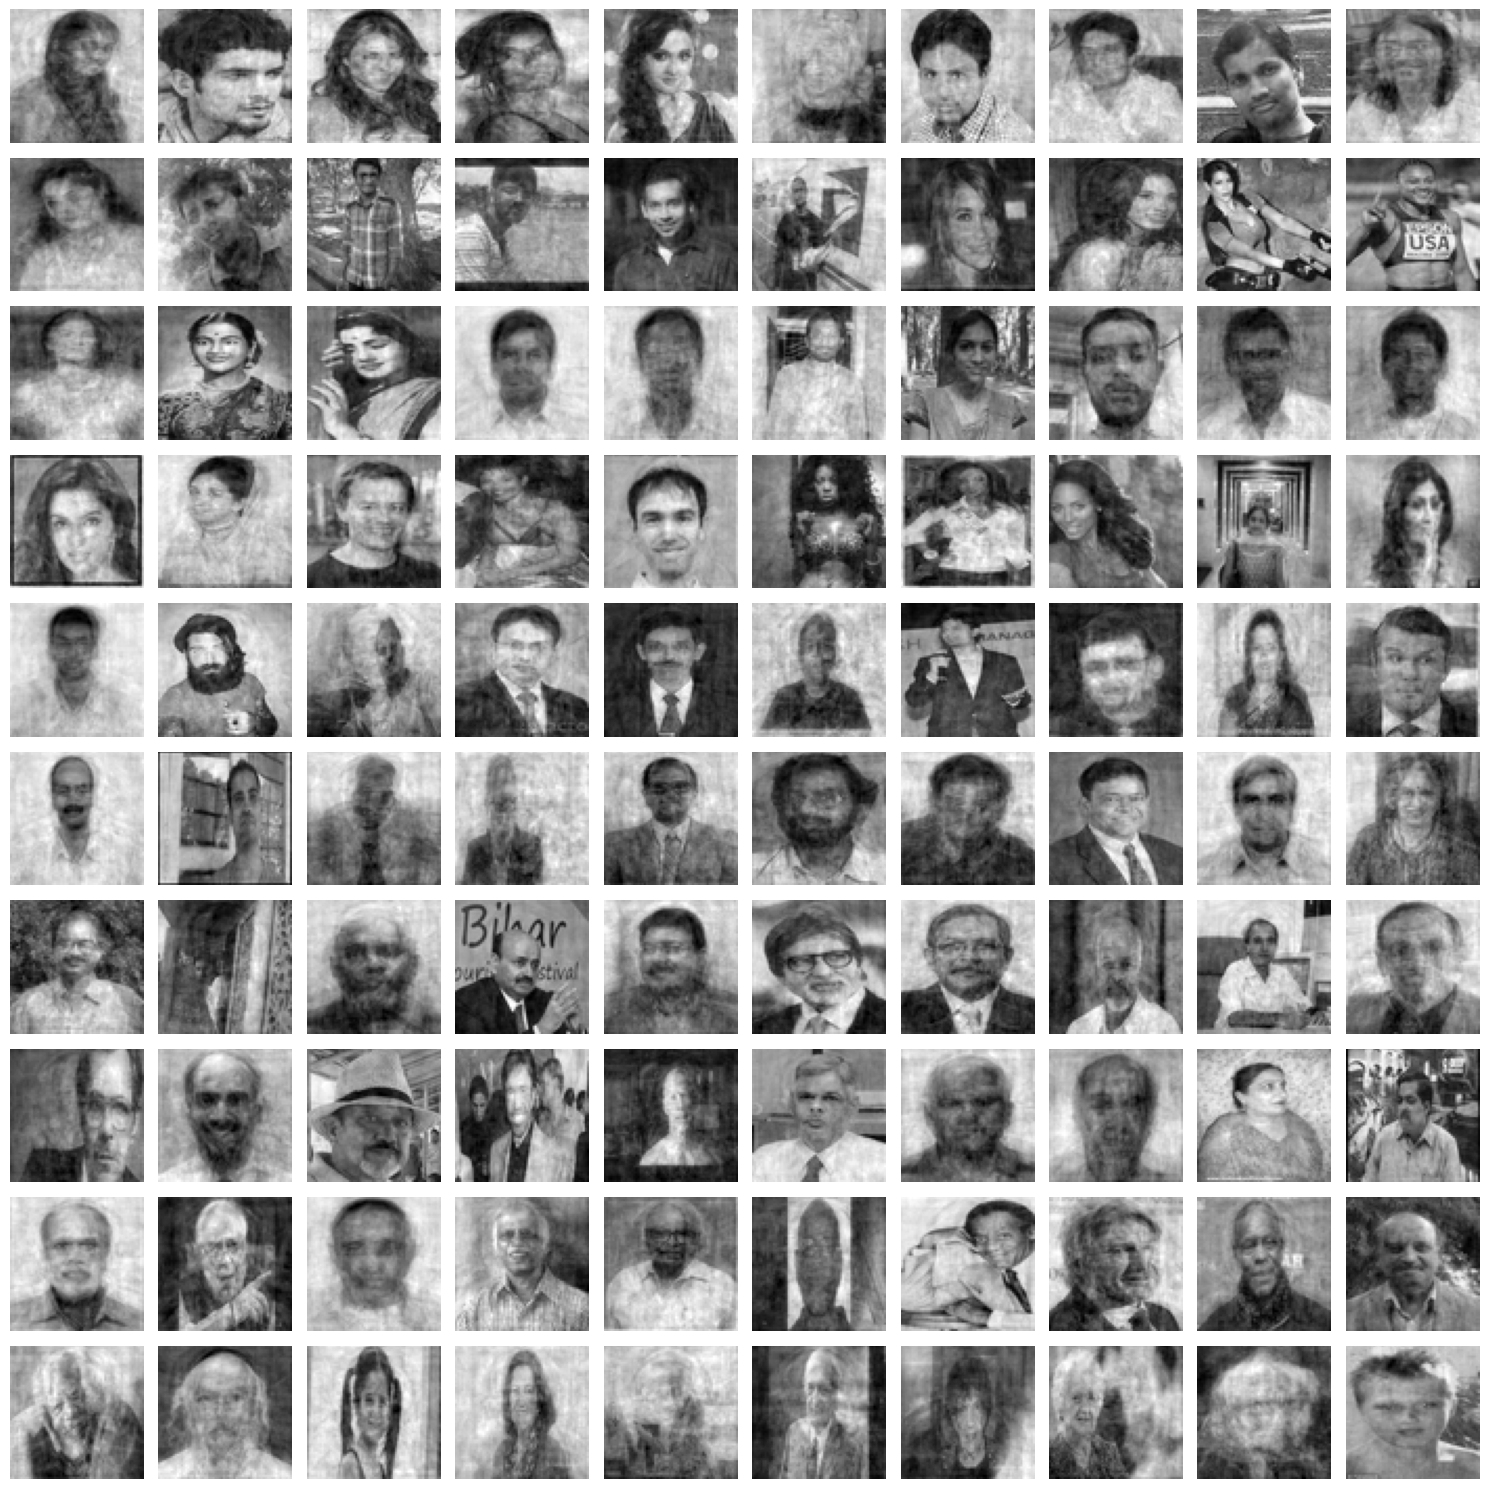

In [9]:
# Chia nhỏ reconstructed_img thành các hàng gồm 10 ảnh
num_images_per_row = 10
num_rows = reconstructed_img.shape[1] // num_images_per_row
images_per_row = np.split(reconstructed_img, num_rows, axis=1)


# Trực quan hóa từng hàng ảnh
fig, axs = plt.subplots(num_rows, num_images_per_row, figsize=(15, 15))
k = 0
for i in range(num_rows):
    for j in range(num_images_per_row):
        # Lấy ảnh từ images_per_row
        image = reconstructed_img[:,k].reshape((64, 64))
        # Vẽ ảnh lên subplot tương ứng
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].axis('off')
        k+=1

plt.tight_layout()
plt.show()